#### Finding Corners and using as a feature

In [ ]:
import cv2
import numpy as np

# before running use run: pip install opencv-contrib-python to install contrib opencv module


image = cv2.imread("D:/Computer_Vision_Recap/images/chess.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# conv image from array dtype to float32
gray_image = np.float32(gray_image)

harris_corners = cv2.cornerHarris(gray_image, 3, 3, 0.05)     # gets the corner locations in the image

# dilation is used to enlarge corner loc by adding pixels
kernel = np.ones((7,7), np.uint8)
enlarged_harris_corners = cv2.dilate(harris_corners, kernel = kernel, iterations = 2)

# thereshold for optimal value to change colors of corners
image[enlarged_harris_corners > 0.025 * enlarged_harris_corners.max()] = [0, 100, 255]

cv2.imshow("The Harris Corners", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Alternate Improved Corner detect - GoodFeaturesToTrack
import cv2
import numpy as np

img = cv2.imread("D:/Computer_Vision_Recap/images/chess.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 60 is max num_corners
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners = 60, qualityLevel = 0.05, minDistance = 16)

for corner in corners:
    # iterates through each corner and plot the rectangle
    x, y = corner[0]
    x = int(x)
    y= int(y)
    cv2.rectangle(img, (x-5, y -10), (x+10, y+10), (0,0, 255), 3)

cv2.imshow("Good Feature To Track corners", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

***
#### Feature Detection(SIFT, SURF, FAST, BRIEF, ORB)

In [1]:
# SIFT(can be used in production app, patented)

import cv2
import numpy as np

image = cv2.imread("D:/Computer_Vision_Recap/images/input.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift_detector = cv2.SIFT()

# detect keypoints
keypoints = sift.detect(gray_image, None)
print("Number of points detected: ", len(keypoints))

image_with_keypoints = cv2.drawKeypoints(image, keypoints, cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("Feature Method-SIFT", image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d_SIFT_create'

In [3]:
# SURF(Patented and can't be used in production app)
import cv2
import numpy as np

image = cv2.imread("D:/Computer_Vision_Recap/images/input.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

surf_detector = cv2.SURF()

# detect keypoints and only features whose hessin > threshold(7000) are retained by detector
surf_detector.hessianThreshold = 7500
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
print("Number of points detected: ", len(keypoints))

image_with_keypoints = cv2.drawKeypoints(image, keypoints, cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("Feature Method-SURF", image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


In [1]:
# FAST
import cv2
import numpy as np

image = cv2.imread("D:/Computer_Vision_Recap/images/input.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fast_detector = cv2.FastFeatureDetector_create()

# keypoints and by def non max suppressino is on, to turn off
# set fast_detector.setBool("nonmaxSuppression", False)
keypoints = fast_detector.detect(gray_image, None)
print("Number of points detected: ", len(keypoints))

image_with_keypoints = cv2.drawKeypoints(image, keypoints, cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("Feature Method-FAST", image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of points detected:  8963


In [ ]:
# BRIEF(patented )
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("D:/Computer_Vision_Recap/images/input.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# fast detector object
fast_detector = cv2.FastFeatureDetector_create()

# brief detector obj
brief_detector = cv2.DescriptorExtractor_create("BRIEF")

# det keypoints using fast
keypoints = fast_detector.detect(gray_image, None)

# obtain the descriptors and new final keypoints using brief
keypoints, descriptors = brief_detector.compute(gray_image, keypoints)
print("Number of points detected: ", len(keypoints))

image_with_keypoints = cv2.drawKeypoints(image, keypoints, cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("Feature Method-BRIEF", image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
# ORB
import cv2
import numpy as np

image = cv2.imread("D:/Computer_Vision_Recap/images/input.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#ORB obj, with num of keypoints set to 1500
orb_detector = cv2.ORB_create(8500)

# det keypoints
keypoints = orb_detector.detect(gray_image, None)

# obtain descriptors
keypoints, descriptors = orb_detector.compute(gray_image, keypoints)
print("Number of points detected: ", len(keypoints))

image_with_keypoints = cv2.drawKeypoints(image, keypoints, cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("Feature Method-ORB", image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of points detected:  8003


***
### Histogram of Oriented Gradients

**Note yet Understood**

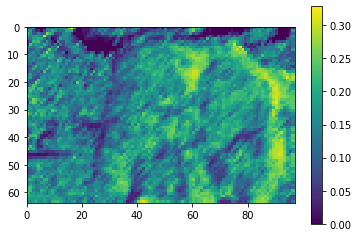

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("D:/Computer_Vision_Recap/images/elephant.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# height and widt in pixels
cell_size = (8, 8)

# height and width in cells
block_size = (2,2)

# num of orientation bins 
nbins = 9

# def HOG descriptor and winSize is size of image cropped to multiple of cell size
hog_descriptor = cv2.HOGDescriptor(
    _winSize = (gray_image.shape[1] // cell_size[1] * cell_size[1],
               gray_image.shape[0] // cell_size[0] * cell_size[0]),
    _blockSize=(block_size[1] * cell_size[1],
               block_size[0] * cell_size[0]),
    _blockStride=(cell_size[1], cell_size[0]),
    _cellSize = (cell_size[1], cell_size[0]),
    _nbins=nbins
)


# create np array shape for the hog features
n_cells = (gray_image.shape[0] // cell_size[0], gray_image.shape[1] // cell_size[1])



# gets the n features(by rows idx), hog features contains gradient amp for 
# each dir, for each cell of its group for each group
hog_features = hog_descriptor.compute(gray_image).reshape(n_cells[1] - block_size[1] + 1,
                                                         n_cells[0] - block_size[0] + 1,
                                                         block_size[0], block_size[1], nbins).transpose((1, 0, 2, 3, 4))

# create gradient array with nbin dim to store gradient orientations
gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# create array for cell dim
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, np.int)


# Block normalization
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                 off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_features[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                 off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
        
# avg gradients
gradients /= cell_count



# plots HOG and angle is 360 / nbins * direction
color_bins = 6
plt.pcolor(gradients[:, :, color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect("equal", adjustable = "box")
plt.colorbar()
plt.show()
cv2.destroyAllWindows()